<AxesSubplot:>

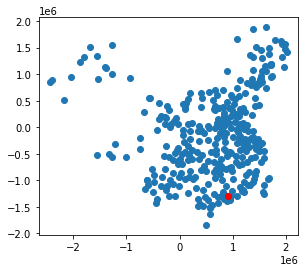

In [1]:
# 引入所需的 geopandas 库
import geopandas as gpd


# 读取 shapefile 文件，注意编码为 "utf-8"
cities = gpd.read_file('./GeoData/china_cities.shp', encoding="utf-8")

# 新建空列表用于存放每个城市 100km 缓冲区范围内的城市数量
in_buffer_count = []
for point in cities["geometry"]:
    buffer = point.buffer(100000) # 创建缓冲区
    in_buffer = cities.within(buffer) # 判断城市是否在缓冲区内
    in_buffer = in_buffer[in_buffer == True] # 选取落在缓冲区内的城市
    in_buffer_count.append(in_buffer.count()) # 统计在缓冲区内的城市数量

# 添加 count 字段
cities["count"] = in_buffer_count
# 找出 100km 缓冲区范围内的城市数量最多的城市
max_count_city = cities[cities["count"]
                        == cities["count"].max()]

# 绘图显示
ax1 = cities.plot()
max_count_city.plot(ax=ax1, color='r')


In [2]:
# 输出 100km 缓冲区范围内的城市数量最多的城市的具体信息
max_count_city

,NAME,type,POINT_X,POINT_Y,geometry,count
69,东莞市,地级市,113.746483,23.044216,POINT (905573.384 -1289156.540),10


In [3]:
# 将带有 count 字段的 GeoDataFrame 输出为 shapefile 文件，注意编码为 "utf-8"
cities.to_file('./GeoData/count_cities.shp', encoding='utf-8')